In [18]:
import pandas as pd
import json
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import plotly.express as px

In [19]:
df = pd.read_csv('data/processed.tsv', sep='\t')

In [23]:
no_outliers = df[df['tc'] < df['tc'].quantile(q=0.99)]

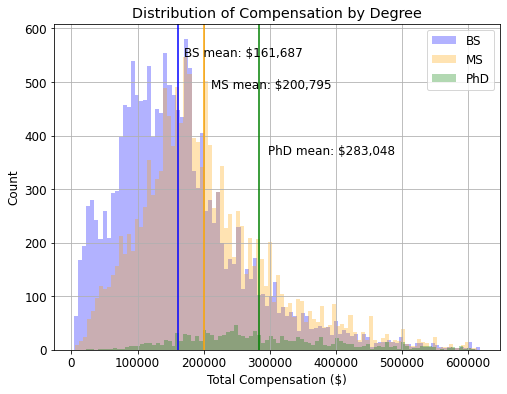

In [30]:
colors = ['blue', 'orange', '', 'green']
names = ['BS', 'MS', '', 'PhD']
plt.rcParams.update({'font.size': 12})

plt.figure(figsize=(8, 6))
for i, v in enumerate(no_outliers['degree'].unique()):
    if not pd.isna(v):
        group = no_outliers[no_outliers['degree'] == v]['tc']
        group.hist(label=names[i], bins=100, alpha=0.3, color=colors[i])
        plt.axvline(group.mean(), color=colors[i])
        min_ylim, max_ylim = plt.ylim()
        plt.text(group.mean()*1.05, max_ylim*(.9-(0.1*i)), f'{names[i]} mean: ${round(group.mean()):,}')

plt.legend()
plt.ylabel('Count')
plt.xlabel('Total Compensation ($)')
plt.title('Distribution of Compensation by Degree')
plt.savefig('total_comp_by_degree.png')

array([[<AxesSubplot:title={'center':'bachelor'}>,
        <AxesSubplot:title={'center':'master'}>],
       [<AxesSubplot:title={'center':'phd'}>, <AxesSubplot:>]],
      dtype=object)

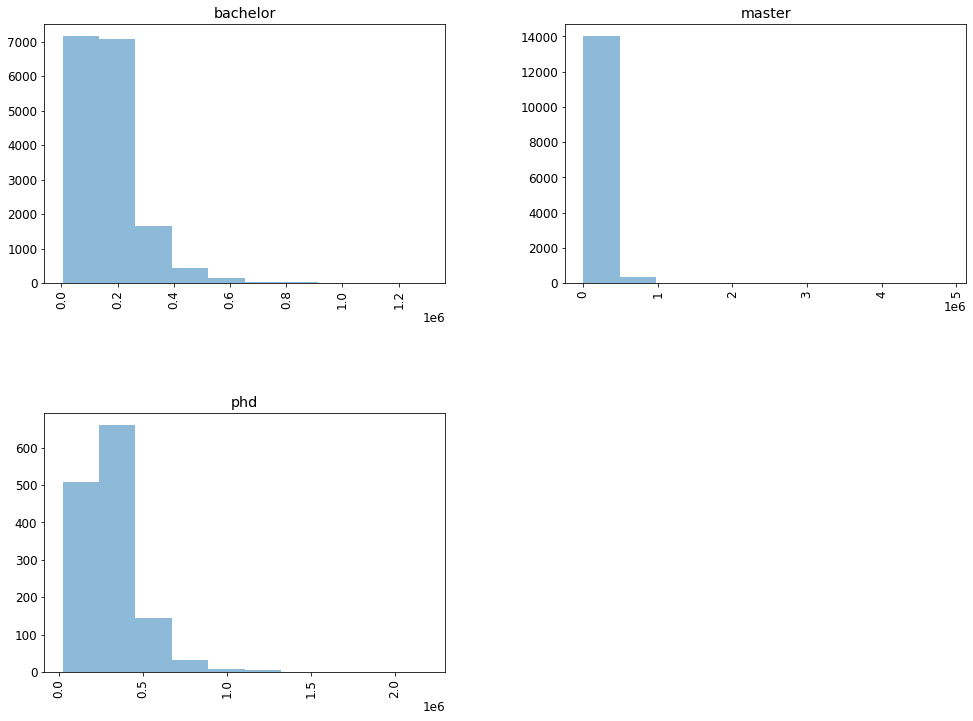

In [31]:
df['tc'].hist(by=df['degree'], alpha=0.5)

<AxesSubplot:xlabel='yoe_total', ylabel='tc'>

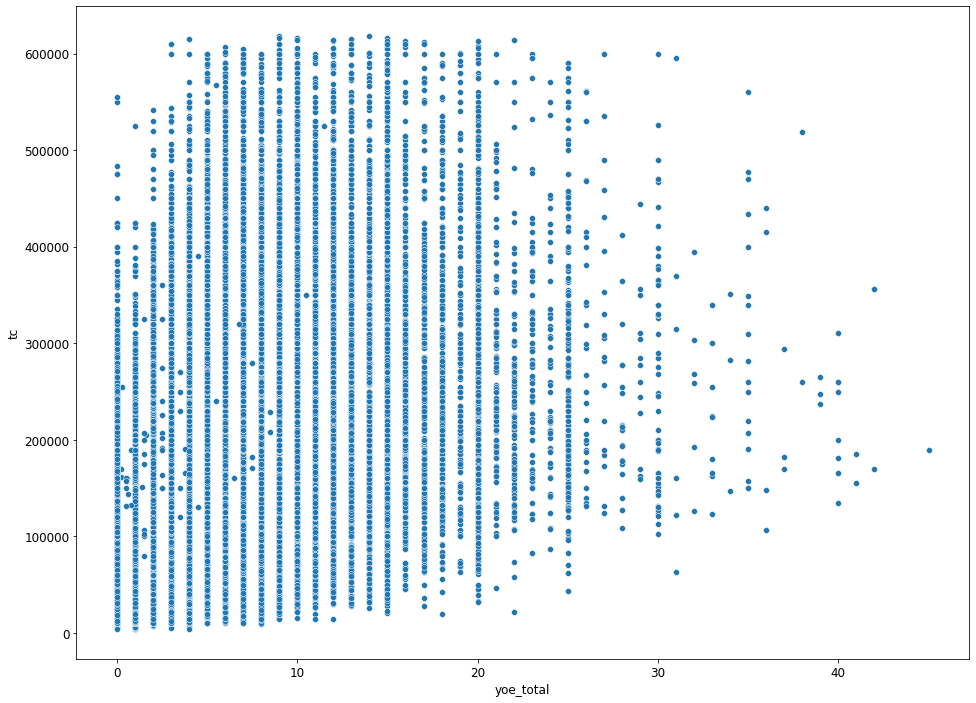

In [32]:
import seaborn as sns
sns.scatterplot(y='tc', x='yoe_total', data=no_outliers)

<AxesSubplot:xlabel='yoe_total', ylabel='tc'>

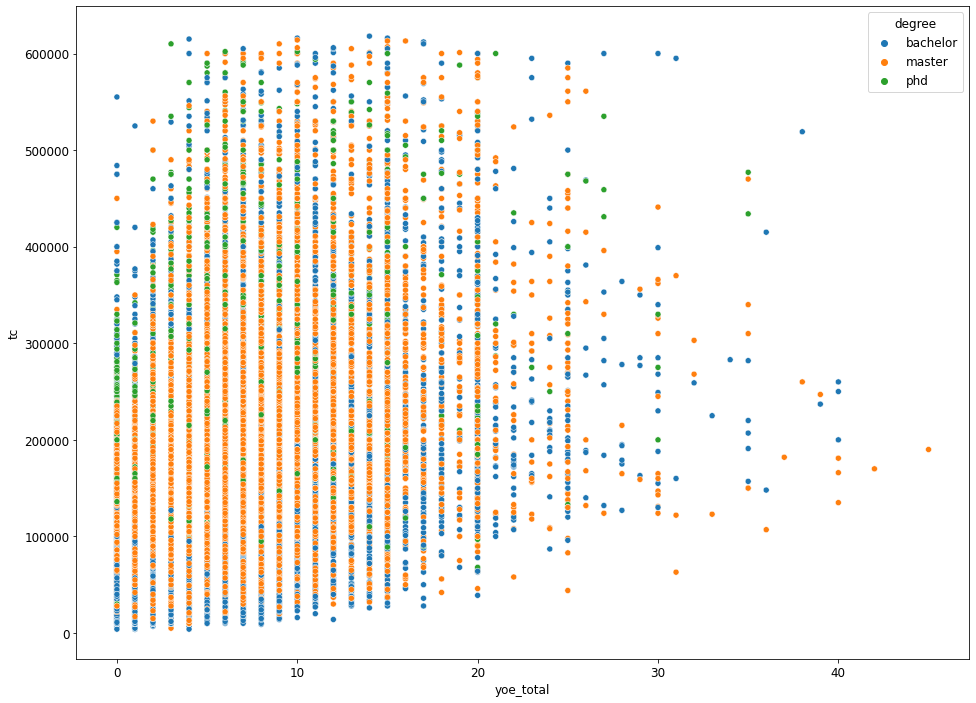

In [33]:
sns.scatterplot(y='tc', x='yoe_total', data=no_outliers, hue='degree')

In [34]:
plt.rcParams["figure.figsize"] = (16,12)

<AxesSubplot:xlabel='yoe_total', ylabel='tc_mean'>

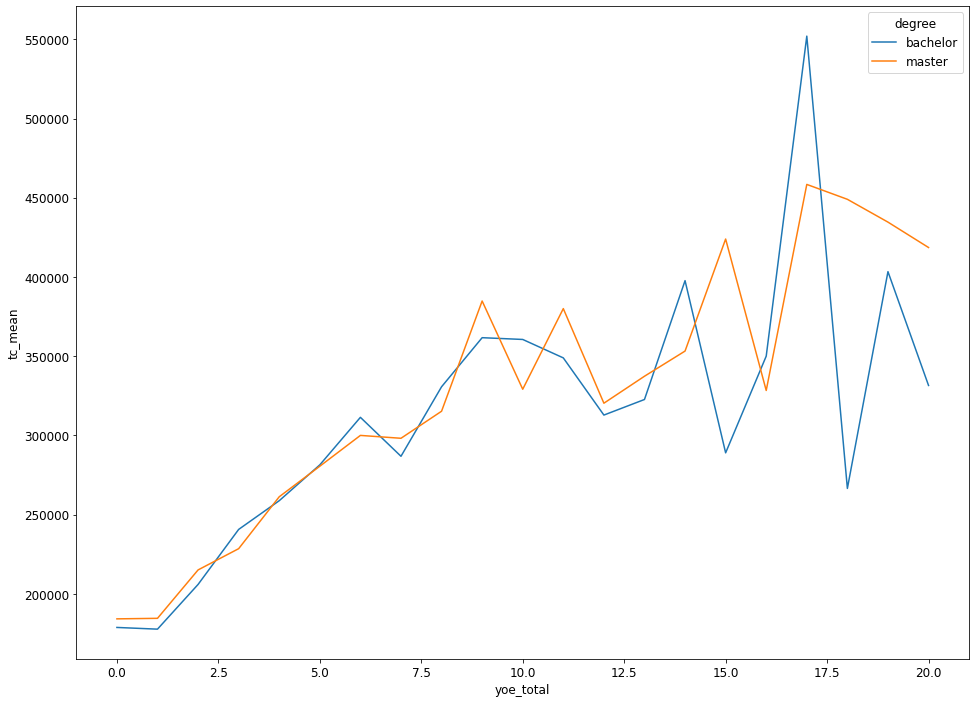

In [36]:
temp_df = df[df['yoe_total'] <= 20]
temp_df = temp_df[temp_df['degree'] != 'phd']
temp_df = temp_df[temp_df['location'] == 'San Francisco, CA']
#temp_df = temp_df[temp_df['location'] == 'Seattle, WA']
grped = temp_df.groupby(['degree', 'yoe_total']).agg({'tc': ['mean', 'count', 'median', 'std']})
grped.columns = grped.columns.map('_'.join)
grped['lower'] = grped['tc_mean'] - grped['tc_std']
grped['upper'] = grped['tc_mean'] + grped['tc_std']

sns.lineplot(data=grped, x='yoe_total', y='tc_mean', hue='degree')

# for degree in grped.index.unique('degree'):
#     grped_degree = grped.loc[degree]

#     plt.plot(grped_degree.index, grped_degree['lower'], color='tab:blue', alpha=0.1)
#     plt.plot(grped_degree.index, grped_degree['upper'], color='tab:blue', alpha=0.1)
#     plt.fill_between(grped_degree.index, grped_degree['lower'], grped_degree['upper'], alpha=0.2)

In [37]:
grped.index.get_level_values('degree')

Index(['bachelor', 'bachelor', 'bachelor', 'bachelor', 'bachelor', 'bachelor',
       'bachelor', 'bachelor', 'bachelor', 'bachelor', 'bachelor', 'bachelor',
       'bachelor', 'bachelor', 'bachelor', 'bachelor', 'bachelor', 'bachelor',
       'bachelor', 'bachelor', 'bachelor', 'master', 'master', 'master',
       'master', 'master', 'master', 'master', 'master', 'master', 'master',
       'master', 'master', 'master', 'master', 'master', 'master', 'master',
       'master', 'master', 'master', 'master'],
      dtype='object', name='degree')

In [38]:
px.line(grped, x=grped.index.get_level_values('yoe_total'), y='tc_mean', color=grped.index.get_level_values('degree'))

<AxesSubplot:xlabel='yoe_total', ylabel='tc_median'>

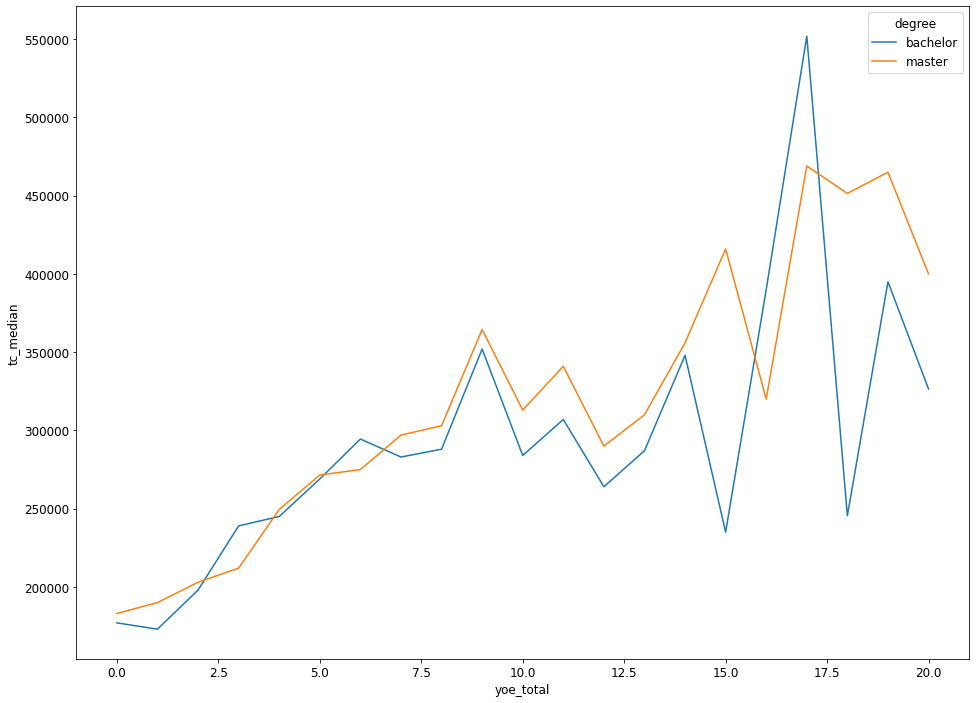

In [39]:
sns.lineplot(data=grped, x='yoe_total', y='tc_median', hue='degree')

In [40]:
grped.loc['bachelor']

,tc_mean,tc_count,tc_median,tc_std,lower,upper
yoe_total,,,,,,
0.0,178754.601227,163,177000.0,41091.450558,137663.150669,219846.051785
1.0,177676.190476,105,173000.0,50572.585922,127103.604554,228248.776399
2.0,205891.891892,111,198000.0,68715.004495,137176.887397,274606.896387
3.0,240622.448980,98,239000.0,75571.433443,165051.015536,316193.882423
4.0,258757.575758,99,245000.0,94967.458541,163790.117216,353725.034299
5.0,281377.192982,114,269000.0,122685.971557,158691.221426,404063.164539
6.0,311375.000000,64,294500.0,132755.473985,178619.526015,444130.473985
7.0,286794.871795,39,283000.0,87098.607001,199696.264794,373893.478795
8.0,330666.666667,45,288000.0,127273.506491,203393.160176,457940.173158


<AxesSubplot:xlabel='yoe_total', ylabel='tc_count'>

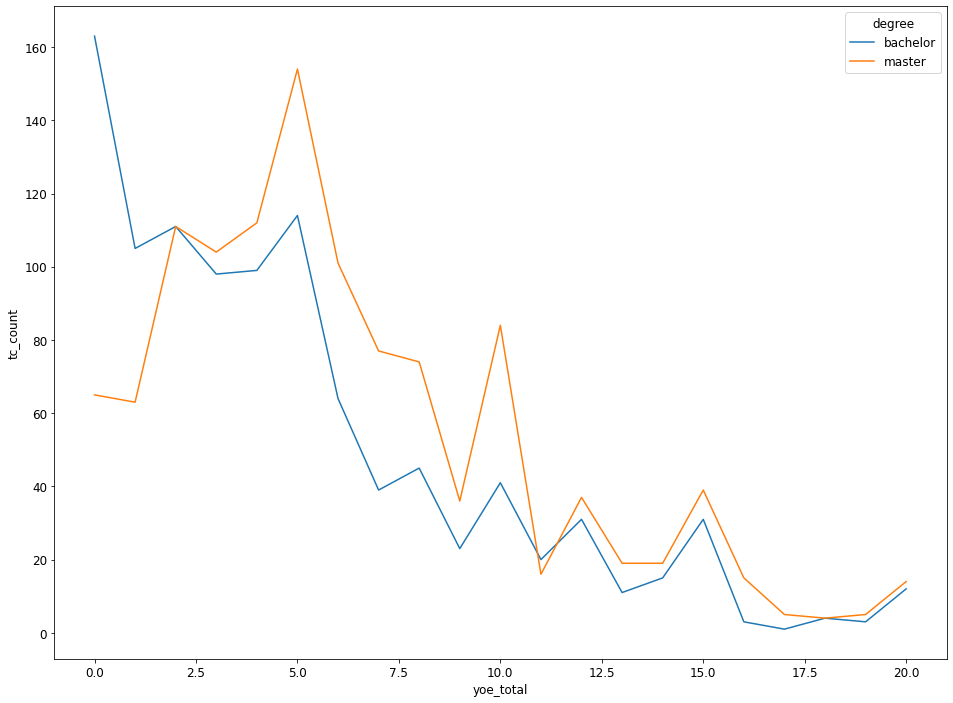

In [41]:
sns.lineplot(data=grped, x='yoe_total', y='tc_count', hue='degree')

In [42]:
df.groupby('gender').agg({'tc': ['mean', 'count', 'median']})

tc                 
                     mean  count    median
gender                                    
Female      184680.171770   5356  170000.0
Male        192703.207982  37282  171000.0
Non-binary  205531.680441    363  176000.0

In [43]:
grped.loc['master']

,tc_mean,tc_count,tc_median,tc_std,lower,upper
yoe_total,,,,,,
0.0,184169.230769,65,183000.0,25454.965890,158714.264879,209624.196659
1.0,184507.936508,63,190000.0,39219.758440,145288.178068,223727.694948
2.0,215054.054054,111,203000.0,60130.288516,154923.765538,275184.342570
3.0,228471.153846,104,212000.0,66843.093584,161628.060263,295314.247430
4.0,261241.071429,112,249500.0,77962.828465,183278.242964,339203.899894
5.0,280525.974026,154,271500.0,88602.895986,191923.078040,369128.870012
6.0,299970.297030,101,275000.0,113329.912684,186640.384346,413300.209713
7.0,298155.844156,77,297000.0,106755.754798,191400.089358,404911.598954
8.0,315229.729730,74,303000.0,106928.928810,208300.800920,422158.658539


In [45]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,tc,base,stock,bonus,yrs_at_company,yoe_total
count,61223.00000,58471.00000,41524.00000,44685.00000,61223.00000,61223.00000
mean,197737.87629,134373.80924,64160.55775,22139.19660,2.23626,5.94945
std,122039.29952,55669.27503,81403.35669,31868.90240,2.85442,5.20653
min,4000.00000,1000.00000,1000.00000,1000.00000,0.00000,0.00000
25%,121000.00000,105000.00000,20000.00000,10000.00000,0.00000,2.00000
50%,175000.00000,135000.00000,40000.00000,16000.00000,1.00000,5.00000
75%,245000.00000,164000.00000,80000.00000,28000.00000,3.00000,9.00000
max,4885000.00000,950000.00000,4200000.00000,4000000.00000,40.00000,45.00000


## Unused EDA Snippets

In [42]:
categories = defaultdict(int)

for row in df['other'].tolist():
    if isinstance(row, list):
        for item in row:
            if ':' in item:
                categories[item.split(':')[0].strip().lower()] += 1

In [44]:
attributes = []
for row in df['other'].tolist():
    if isinstance(row, list):
        for item in row:
            item = item.lower()
            if 'title' not in item and 'race' not in item and 'academic' not in item and 'remote' not in item:
                attributes.append(item)
attributes

['$15000 sign-on bonus',
 '10k relocation bonus',
 ' negotiated amount: $7k',
 '20k relocation bonus',
 'bonus includes $31712 sign on bonus',
 '30000 sign on',
 '+75000 sign-on bonus',
 ' negotiated amount: $10k',
 '$4700 joining bonus',
 ' negotiated amount: $46.7k',
 '$5000 sign-on bonus for application software engineer (l2)',
 '$1500 wfh/wellness reimbursement',
 ' fully paid transit pass',
 '$30k signing bonus (not included in the other numbers)',
 ' tc negotiated up',
 ' negotiated amount: $18k',
 ' advisory',
 '$7k relocation bonus',
 ' negotiated amount: $1.3k',
 '8k relocation bonus',
 ' 40k joining bonus',
 'services team',
 '7000 relocation',
 'sign on: 15k; relocation: 10k',
 ' staff',
 '$10k relo',
 '$5500 or relocation benefits',
 ' negotiated amount: $5k',
 'additional $2266 joining bonus',
 '6k relocation budget',
 ' cash out half of what goes unused',
 'stub year bonus is $40k pro-rated. sign-on bonus is $25k. relocation bonus is $5k.',
 '15k signing bonus',
 '$20k si

# Old

In [ ]:
with open('data/salaryData.json') as f:
    data = json.load(f)
df = pd.DataFrame(data)
df

In [20]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

,Company,Location,Date,Level,Title,YOE,TC,Base,Stock,Bonus,Details,Gender
0,Veracode,"Burlington, MA",2022-01-30,L1,API Development (Back-End),0 / 1,"$120,000",120k,NaN,NaN,"Remote, Title: Software Engineer, Race: White,...",Gender: Male
1,IBM,"Rochester, MN",2022-01-30,Staff Engineer,Distributed Systems (Back-End),0 / 0,"$112,000",112k,NaN,NaN,"$15,000 sign-on bonus, Title: Software Develop...",Gender: Male
2,Philips,"Cambridge, MA",2022-01-30,L4,Data,2 / 3,"$122,000",111k,NaN,11k,"10K Relocation Bonus, Title: Cloud Software De...",Gender: Male
3,Teleport,"Oakland, CA",2022-01-30,L3,Site Reliability (SRE),1 / 8,"$180,000",180k,NaN,NaN,"Title: Sre, Race: White, Academic Level: Bache...",Gender: Male
4,IBM,"Rochester, MN",2022-01-30,Advisory Engineer,API Development (Back-End),7 / 7,"$128,000",128k,NaN,NaN,"Title: Advisory Software Developer, Race: Whit...",Gender: Male
...,...,...,...,...,...,...,...,...,...,...,...,...
46795,Workday,"Pleasanton, CA",2020-03-11,SWE II,Android,3 / 3,"$145,000",110k,25k,10k,NaN,NaN
46796,Qualcomm,"Boulder, CO",2020-03-11,Engineer,Networking,0 / 0,"$105,000",90k,15k,NaN,Masters,Gender: Male
46797,Guidewire,"San Mateo, CA",2020-03-11,Senior,API Development (Back-End),5 / 13,"$197,000",161k,20k,16k,Masters,Gender: Male
46798,Microsoft,"Redmond, WA",2020-03-11,59,ML / AI,0 / 0,"$160,000",110k,35k,15k,"Joining Bonus of $50,000 to be paid over 2 yea...",Gender: Male


In [5]:
df[(df['company'] == 'Amazon') & (df['title'] == "Software Engineer")].tail(50)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber
61781,2021-08-10 15:30:22,Amazon,L5,Software Engineer,232,"Newark, NJ",3,3,Full Stack,176,53,3,Male,mcloiapt,1288,501,82641
61796,2021-08-10 16:41:53,Amazon,L4,Software Engineer,166,"Seattle, WA",6,1,Distributed Systems (Back-End),99,45,22,Male,jeiady traiall schmaol schriouw knapp mccleos ...,11527,819,82657
61854,2021-08-11 03:38:38,Amazon,L5,Software Engineer,220,"Sydney, NS, Australia",16,0,Distributed Systems (Back-End),160,29,31,,klesp sqaiantly mcuops kwaum,1311,0,82738
61887,2021-08-11 09:22:30,Amazon,SDE I,Software Engineer,176,"Seattle, WA",1,1,Full Stack,127,41,8,Male,nips schlioc shaay spraorry typehn smaiart hyd...,11527,819,82780
61904,2021-08-11 10:47:17,Amazon,L5,Software Engineer,238,"San Diego, CA",3,0,Security,167,48,23,Female,khiough pfaiv schneent xaemp yiady pholly phearth,7416,825,82801
61907,2021-08-11 12:05:32,Amazon,L5,Software Engineer,242,"Seattle, WA",4,4,Distributed Systems (Back-End),127,115,0,,cleency scraesk shraiacy,11527,819,82805
61908,2021-08-11 12:16:06,Amazon,L6,Software Engineer,270,"Seattle, WA",11,9,Full Stack,89,175,6,Male,rhaor briit thruc tseind mcmoary khoosch grerd...,11527,819,82807
61965,2021-08-11 19:00:13,Amazon,L4,Software Engineer,193,"Seattle, WA",0,0,Web Development (Front-End),162,31,0,Male,leiry mcdeulls scriids stiecy synin,11527,819,82886
61973,2021-08-11 20:52:38,Amazon,L5,Software Engineer,283,"Irvine, CA",2,2,Testing (SDET),194,74,15,Male,schraeps squiss mckaiox feiamp dynoialy sproil...,7229,803,82896
61977,2021-08-11 21:37:59,Amazon,L4,Software Engineer,166,"Seattle, WA",0,0,Full Stack,125,11,30,,skoiaf hypunt pluly juopt rhord hraiows feibs ...,11527,819,82902


In [11]:
df['gender'].value_counts()

Male                               35702
                                   19540
Female                              6999
Other                                400
Title: Senior Software Engineer        1
Name: gender, dtype: int64

In [13]:
df['timestamp'].max()

Timestamp('2021-08-17 08:28:57')

In [4]:
df = df.replace('', np.nan)
df.isna().sum()

timestamp                      0
company                        0
level                          0
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          786
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22503
cityid                         0
dmaid                          2
rowNumber                      0
dtype: int64